In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('2023_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        136 non-null    object 
 1   Region                         136 non-null    object 
 2   Happiness Rank                 136 non-null    int64  
 3   Happiness Score                136 non-null    float64
 4   Economy (GDP per Capita)       136 non-null    float64
 5   Family                         136 non-null    float64
 6   Health (Life Expectancy)       136 non-null    float64
 7   Freedom                        136 non-null    float64
 8   Trust (Government Corruption)  136 non-null    float64
 9   Generosity                     136 non-null    float64
 10  Dystopia Residual              136 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 11.8+ KB


### EDA

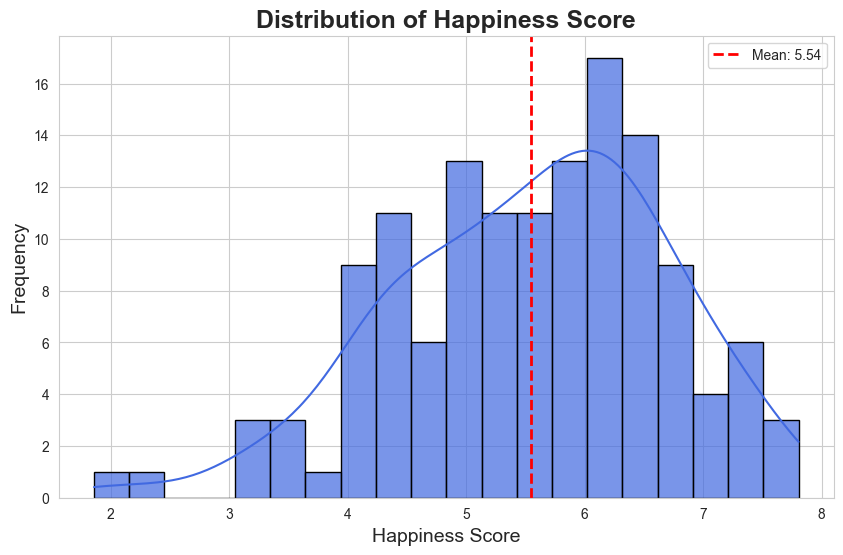

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a nice style
sns.set_style('whitegrid')

# Create a larger figure
plt.figure(figsize=(10, 6))

# Plot with enhanced aesthetics
sns.histplot(df['Happiness Score'], kde=True, bins=20, 
             color='royalblue', alpha=0.7, edgecolor='black')

# Add a vertical line for the mean
plt.axvline(df['Happiness Score'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df["Happiness Score"].mean():.2f}')

# Add labels and title
plt.title('Distribution of Happiness Score', fontsize=18, fontweight='bold')
plt.xlabel('Happiness Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display legend
plt.legend()

# Show the plot
plt.show()



In [6]:
# Top 5 happiest countries
print("Top 5 Happiest Countries")
print(df[['Country', 'Happiness Score']].sort_values(by='Happiness Score', ascending=False).head())

# Bottom 5 least happy countries
print("\nBottom 5 Least Happy Countries")
print(df[['Country', 'Happiness Score']].sort_values(by='Happiness Score').head())


Top 5 Happiest Countries
       Country  Happiness Score
0      Finland           7.8042
1      Denmark           7.5864
2      Iceland           7.5296
3       Israel           7.4729
4  Netherlands           7.4030

Bottom 5 Least Happy Countries
              Country  Happiness Score
135       Afghanistan           1.8590
134           Lebanon           2.3922
133      Sierra Leone           3.1376
132          Zimbabwe           3.2035
131  Congo (Kinshasa)           3.2072


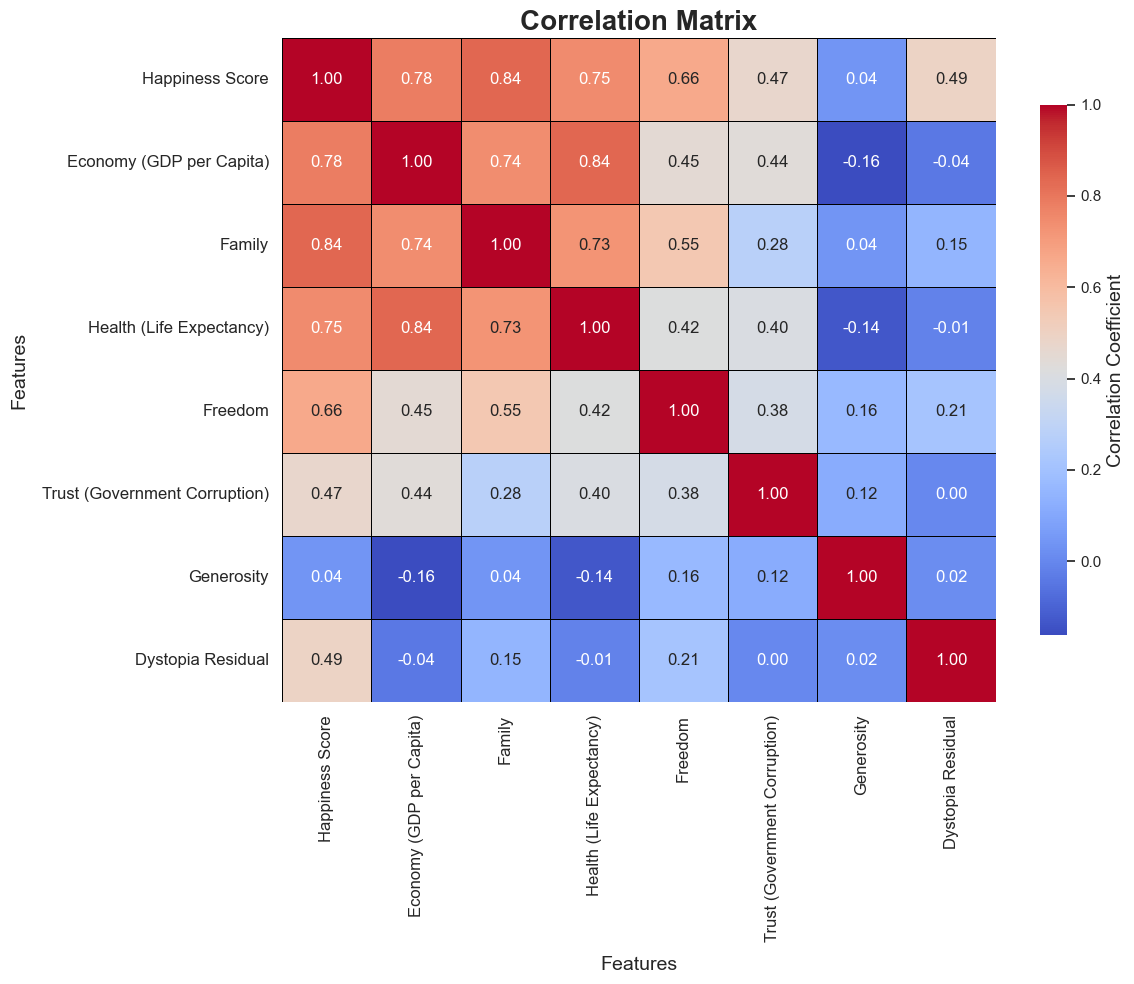

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style='whitegrid')

# Create the figure
plt.figure(figsize=(12, 10))

corr_matrix = numeric_df.corr()
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
                      linewidths=0.5, linecolor='black', cbar_kws={"shrink": 0.8})

# Improve the aesthetics
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=14, labelpad=10)
plt.ylabel('Features', fontsize=14, labelpad=10)

# Add a color bar title
heatmap.collections[0].colorbar.set_label('Correlation Coefficient', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



Region
Australia and New Zealand          7.108750
North America                      6.927200
Western Europe                     6.894365
Latin America and Caribbean        5.965853
Central and Eastern Europe         5.945688
Eastern Asia                       5.930350
Southeastern Asia                  5.431311
Middle East and Northern Africa    5.117054
Sub-Saharan Africa                 4.382442
Southern Asia                      4.089033
Name: Happiness Score, dtype: float64


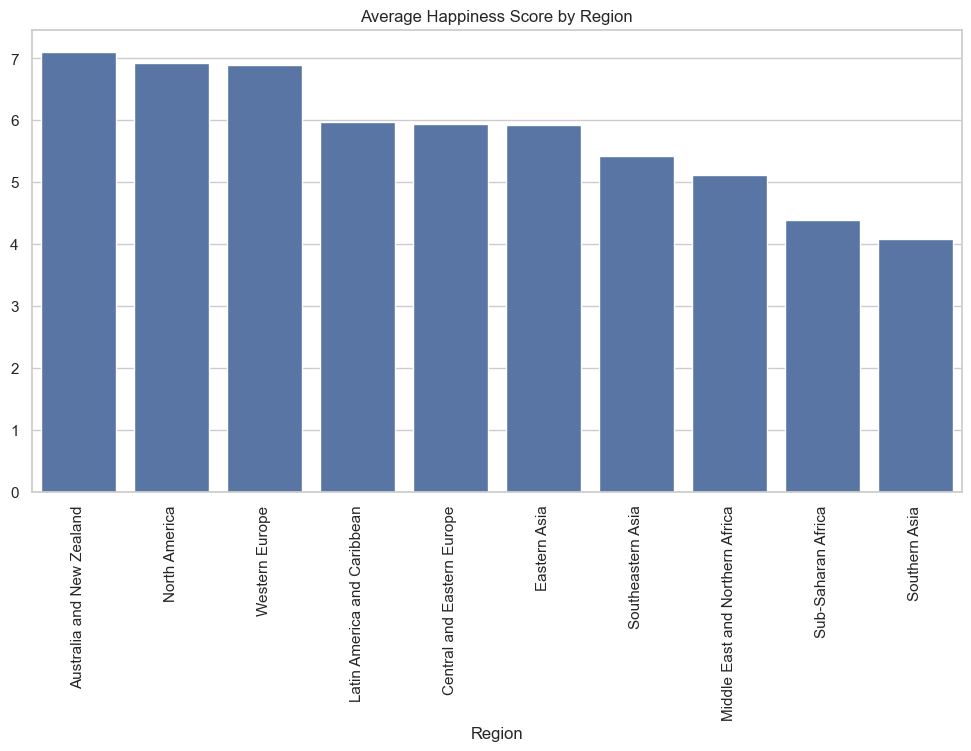

In [8]:
# Average happiness score per region
region_happiness = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
print(region_happiness)

# Plotting regional happiness
plt.figure(figsize=(12, 6))
sns.barplot(x=region_happiness.index, y=region_happiness.values)
plt.xticks(rotation=90)
plt.title('Average Happiness Score by Region')
plt.show()


In [9]:
df[df['Country']== 'Singapore']

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
24,Singapore,Southeastern Asia,25,6.5867,2.167941,1.354451,0.606778,0.660077,0.560821,0.170094,1.066556


### Kmeans

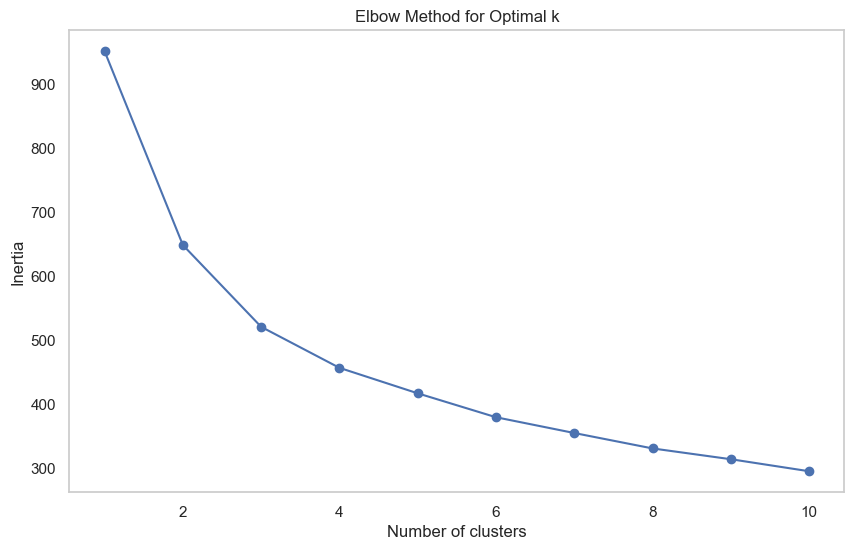

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df is your DataFrame loaded with the happiness data
df = pd.read_csv('2023_cleaned.csv')
# Select relevant features for clustering
features = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
               'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()



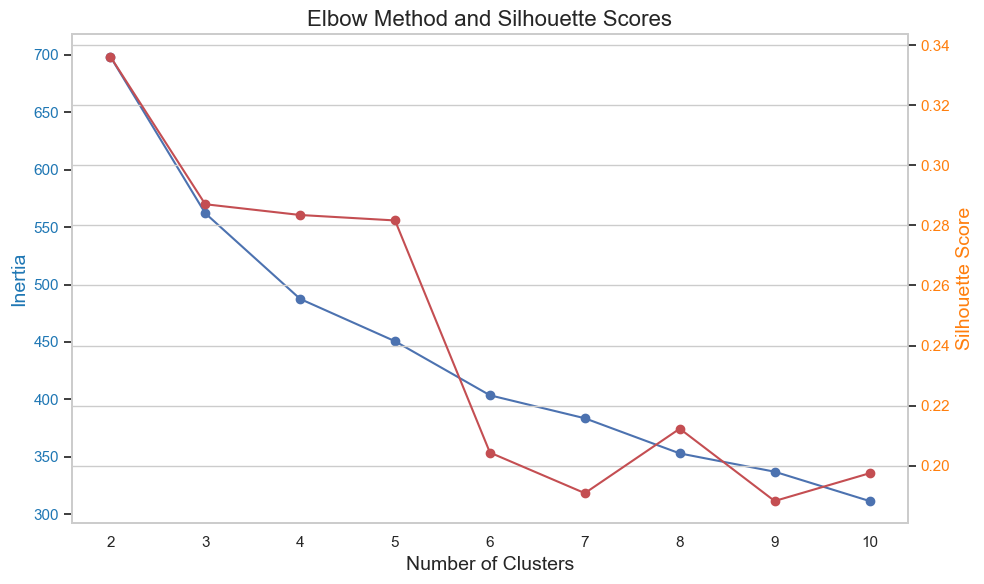

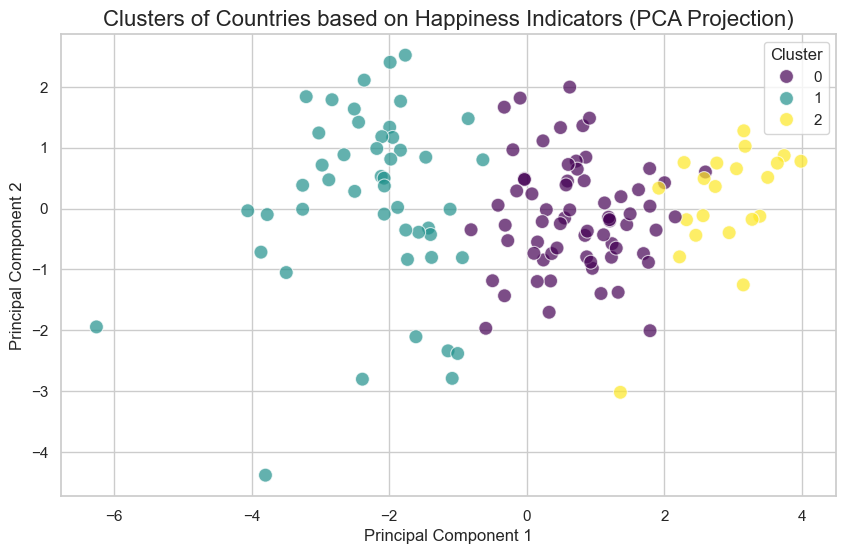

         Economy (GDP per Capita)    Family  Health (Life Expectancy)  \
Cluster                                                                 
0                        1.553461  1.319777                  0.426062   
1                        0.969125  0.797589                  0.204738   
2                        1.953069  1.446536                  0.543783   

          Freedom  Trust (Government Corruption)  Generosity  \
Cluster                                                        
0        0.582901                       0.098720    0.130688   
1        0.426089                       0.106428    0.158365   
2        0.669307                       0.390507    0.186563   

         Dystopia Residual  
Cluster                     
0                 1.859807  
1                 1.653008  
2                 1.801560  


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Assuming df is your DataFrame

# Step 1: Select only numeric columns for KMeans
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(['Happiness Rank'], axis=1)

# Step 2: Scale the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)

# Step 3: Determine optimal number of clusters using Elbow and Silhouette methods
K = range(2, 11)
inertia = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow curve and Silhouette Scores
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Number of Clusters', fontsize=14)
ax1.set_ylabel('Inertia', color='tab:blue', fontsize=14)
ax1.plot(K, inertia, 'bo-', label='Inertia')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='tab:orange', fontsize=14)
ax2.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Elbow Method and Silhouette Scores', fontsize=16)
ax1.grid()
fig.tight_layout()
plt.show()

# Step 4: Fit KMeans with the optimal number of clusters (e.g., k=3)
optimal_k = 3  # Adjust based on the plot's results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Scatter Plot of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Countries based on Happiness Indicators (PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

# Step 6: Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_analysis[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']])


### Agglomerative

In [13]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline


In [14]:
# Select numeric columns for clustering
# Ensure Happiness Rank is dropped from numeric data
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(['Happiness Rank'], axis=1)


# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


In [15]:
numeric_df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.8042,1.888380,1.584900,0.534574,0.771510,0.535299,0.126331,2.363241
1,7.5864,1.949406,1.547875,0.537302,0.734416,0.525221,0.208459,2.083766
2,7.5296,1.925508,1.619666,0.559096,0.738164,0.187119,0.249635,2.250382
3,7.4729,1.833398,1.520674,0.576730,0.568518,0.158292,0.124048,2.691290
4,7.4030,1.942274,1.488228,0.545473,0.672327,0.394062,0.250547,2.110044
...,...,...,...,...,...,...,...,...
131,3.2072,0.530779,0.783747,0.104758,0.375472,0.068287,0.182573,1.161580
132,3.2035,0.758279,0.880513,0.068653,0.362508,0.117115,0.111627,0.904856
133,3.1376,0.669699,0.540343,0.091811,0.370907,0.051077,0.192731,1.221006
134,2.3922,1.416999,0.475936,0.398308,0.122771,0.027208,0.060824,-0.109798


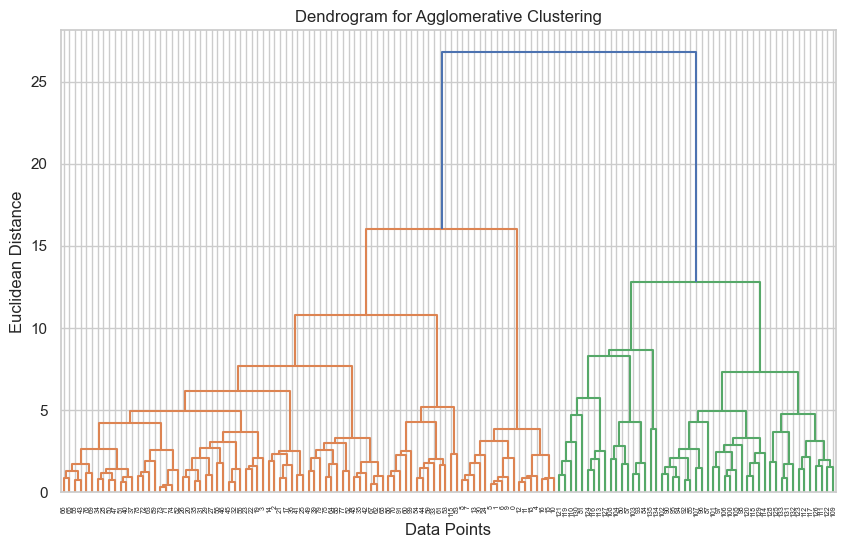

In [16]:
# Generate the linkage matrix for the dendrogram
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [17]:

# Fit Agglomerative Clustering with the corrected parameter
optimal_k = 3 
agg_cluster = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')

# Predict clusters and store them in the DataFrame
df['Agg_Cluster'] = agg_cluster.fit_predict(scaled_data)


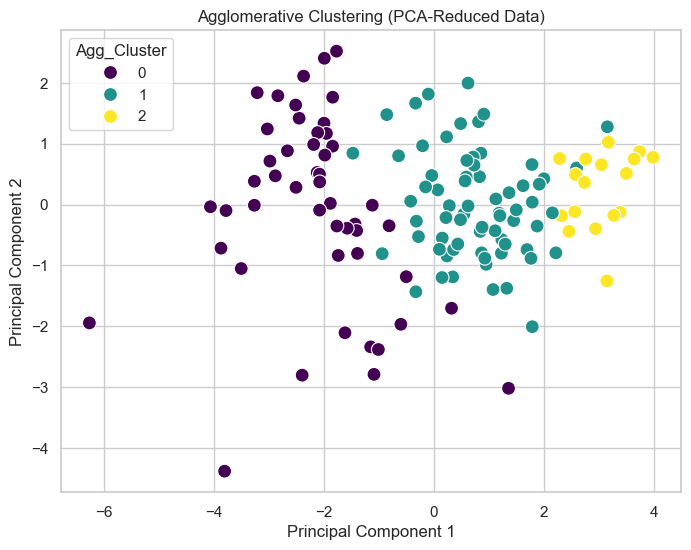

In [18]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Agg_Cluster'], palette='viridis', s=100)
plt.title('Agglomerative Clustering (PCA-Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [19]:
# Group by the clusters and calculate the mean of numeric columns
cluster_analysis = df.groupby('Agg_Cluster').mean(numeric_only=True).drop(['Happiness Rank'], axis=1)

# Display the analysis for key features
print(cluster_analysis[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                        'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']])


             Economy (GDP per Capita)    Family  Health (Life Expectancy)  \
Agg_Cluster                                                                 
0                            1.013493  0.828084                  0.221026   
1                            1.552655  1.308724                  0.425296   
2                            1.956901  1.464694                  0.540703   

              Freedom  Trust (Government Corruption)  Generosity  \
Agg_Cluster                                                        
0            0.415085                       0.107400    0.142580   
1            0.594850                       0.107918    0.143054   
2            0.681379                       0.418033    0.192662   

             Dystopia Residual  
Agg_Cluster                     
0                     1.633583  
1                     1.861654  
2                     1.848405  


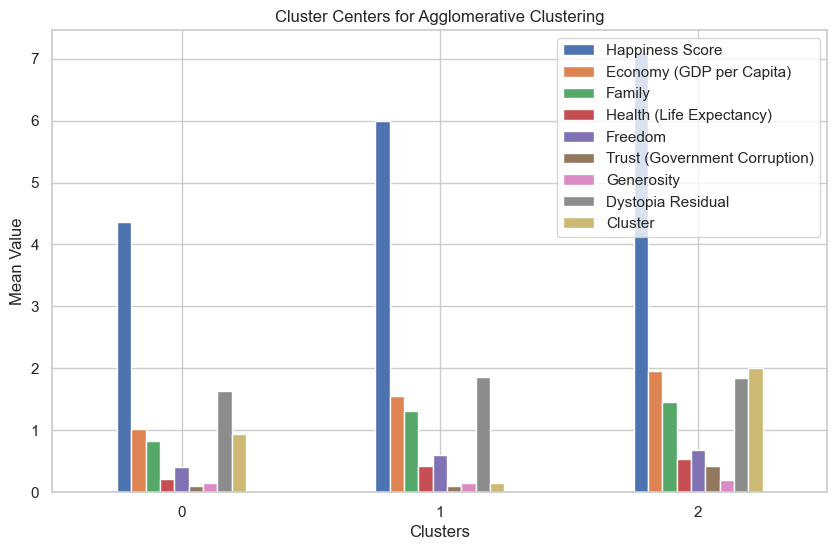

In [20]:
# Plot the cluster centers
cluster_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centers for Agglomerative Clustering')
plt.ylabel('Mean Value')
plt.xlabel('Clusters')
plt.xticks(rotation=0)
plt.show()


In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with numeric columns
numeric_df = df.select_dtypes(include=[np.number]).drop(['Happiness Rank'], axis= 1)

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Choose the number of components
pca_result = pca.fit_transform(scaled_data)

# Step 3: Get the PCA components (loadings)
loadings = pca.components_

# Step 4: Create a DataFrame for loadings
loading_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=numeric_df.columns)

# Step 5: Display loadings
print(loading_df)

# Optional: Sort loadings for better visualization
sorted_loadings = loading_df.abs().sort_values(by='PC1', ascending=False)
print("Top features contributing to PC1:")
print(sorted_loadings[['PC1']].head(10))

sorted_loadings = loading_df.abs().sort_values(by='PC2', ascending=False)
print("Top features contributing to PC2:")
print(sorted_loadings[['PC2']].head(10))


                                    PC1       PC2
Happiness Score                0.431113 -0.094390
Economy (GDP per Capita)       0.393400 -0.089769
Family                         0.388617 -0.199492
Health (Life Expectancy)       0.382902 -0.119585
Freedom                        0.319734  0.010792
Trust (Government Corruption)  0.269157  0.513020
Generosity                     0.021136  0.387529
Dystopia Residual              0.101339 -0.160818
Cluster                        0.048613  0.695463
Agg_Cluster                    0.417118  0.076927
Top features contributing to PC1:
                                    PC1
Happiness Score                0.431113
Agg_Cluster                    0.417118
Economy (GDP per Capita)       0.393400
Family                         0.388617
Health (Life Expectancy)       0.382902
Freedom                        0.319734
Trust (Government Corruption)  0.269157
Dystopia Residual              0.101339
Cluster                        0.048613
Generosity      

In [40]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with numeric columns
numeric_df = df.select_dtypes(include=[np.number]).drop(['Happiness Rank'], axis= 1)

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Choose the number of components
pca.fit(scaled_data)
pca_result = pca.transform(scaled_data)

# Step 3: Create a DataFrame for loadings
loadings = pca.components_.T  # Transpose to get features as rows
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=numeric_df.columns)

# Step 4: Display the loading DataFrame
print("PCA Loadings DataFrame:")
print(loading_df)

# Optional: Sort loadings for better visualization
sorted_loadings_pc1 = loading_df.abs().sort_values(by='PC1', ascending=False)
sorted_loadings_pc2 = loading_df.abs().sort_values(by='PC2', ascending=False)

print("\nTop features contributing to PC1:")
print(sorted_loadings_pc1[['PC1']].head(10))

print("\nTop features contributing to PC2:")
print(sorted_loadings_pc2[['PC2']].head(10))


PCA Loadings DataFrame:
                                    PC1       PC2
Happiness Score                0.430838 -0.096096
Economy (GDP per Capita)       0.393420 -0.090878
Family                         0.388284 -0.200931
Health (Life Expectancy)       0.383164 -0.120490
Freedom                        0.318962  0.008930
Trust (Government Corruption)  0.269633  0.511833
Generosity                     0.019980  0.386016
Dystopia Residual              0.101118 -0.161435
Cluster                        0.050630  0.695638
Agg_Cluster                    0.417605  0.081121

Top features contributing to PC1:
                                    PC1
Happiness Score                0.430838
Agg_Cluster                    0.417605
Economy (GDP per Capita)       0.393420
Family                         0.388284
Health (Life Expectancy)       0.383164
Freedom                        0.318962
Trust (Government Corruption)  0.269633
Dystopia Residual              0.101118
Cluster                        

## Mean shift

Estimated Bandwidth: 2.5572490398193986


C:\Users\lkhse\AppData\Local\Temp\ipykernel_3928\3493977871.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(clusters))


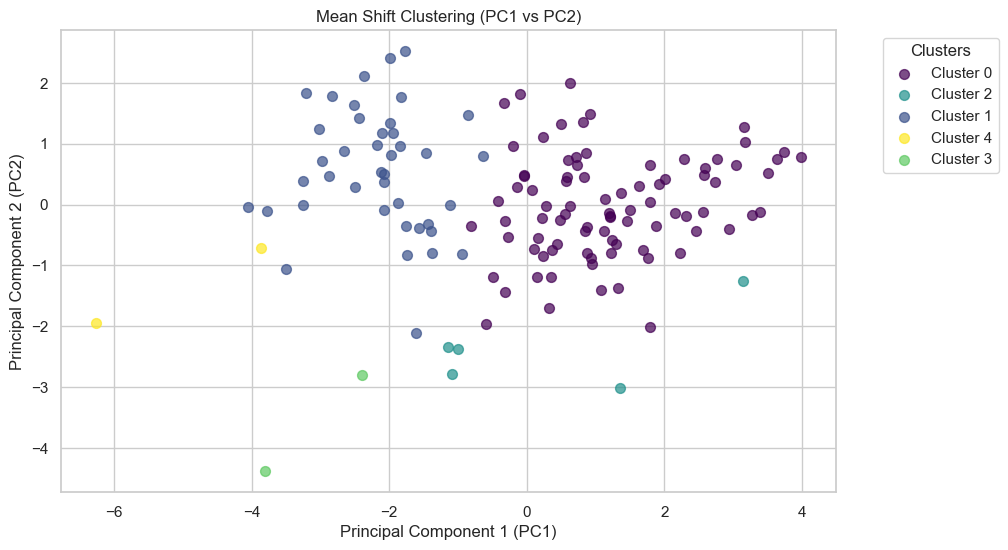

Number of clusters found: 5
Cluster Centers (Scaled Data):
[[ 0.43547105  0.36781241  0.48131774  0.39264309  0.32567446 -0.2510561
  -0.25294019  0.24059489]
 [-0.96316479 -1.15594138 -1.13372144 -1.30493003 -0.56787888 -0.33737153
   0.23107924  0.17200211]
 [-0.20718458  1.25347174  0.14195705  2.14901219 -0.89923681  1.92385294
  -0.35067242 -2.47262118]
 [-2.7684657   0.01866213 -2.08273396  0.20616997 -2.80382864 -0.94248524
  -1.16596134 -3.75623318]
 [-3.23675608 -1.76761086 -3.54235455 -1.7899868  -3.62709196 -0.69410951
  -0.74136133 -1.59544438]]

Cluster Centers (Original Scale):
   Happiness Score  Economy (GDP per Capita)    Family  \
0         6.040234                  1.567974  1.311991   
1         4.447733                  0.909091  0.785378   
2         5.308500                  1.950940  1.201336   
3         2.392200                  1.416999  0.475936   
4         1.859000                  0.644600  0.000000   

   Health (Life Expectancy)   Freedom  Trust (Govern

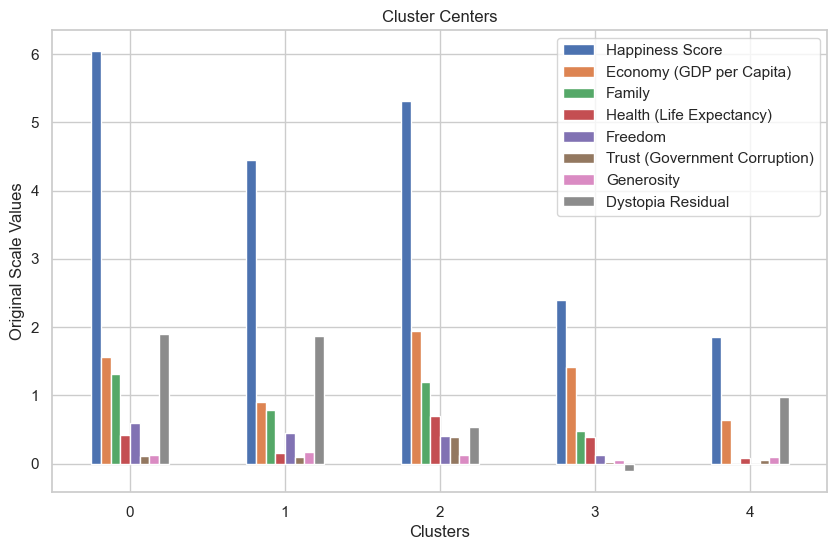

In [28]:

from sklearn.cluster import MeanShift, estimate_bandwidth

# Select numeric columns for clustering
numeric_df = df[['Happiness Score', 'Economy (GDP per Capita)', 'Family',
                 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                 'Generosity', 'Dystopia Residual']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Perform PCA for 2D plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PC1'], df['PC2'] = pca_result[:, 0], pca_result[:, 1]

# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(scaled_data, quantile=0.2, n_samples=500)
print(f"Estimated Bandwidth: {bandwidth}")

# Apply Mean Shift clustering
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
df['MeanShift_Cluster'] = mean_shift.fit_predict(scaled_data)

# Scatter plot with a legend for clusters
plt.figure(figsize=(10, 6))

# Get unique clusters and generate colors
clusters = df['MeanShift_Cluster'].unique()
colors = plt.cm.get_cmap('viridis', len(clusters))

# Plot each cluster with a unique color
for cluster in clusters:
    mask = df['MeanShift_Cluster'] == cluster
    plt.scatter(
        df.loc[mask, 'PC1'], df.loc[mask, 'PC2'],
        label=f'Cluster {cluster}',
        color=colors(cluster),
        s=50, alpha=0.7
    )

# Add title, labels, and legend
plt.title('Mean Shift Clustering (PC1 vs PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Analyze the number of clusters found
num_clusters = len(np.unique(df['MeanShift_Cluster']))
print(f"Number of clusters found: {num_clusters}")

# Print the cluster centers
cluster_centers = mean_shift.cluster_centers_
print("Cluster Centers (Scaled Data):")
print(cluster_centers)

# Inverse transform the cluster centers to the original scale
original_centers = scaler.inverse_transform(cluster_centers)
centers_df = pd.DataFrame(original_centers, columns=numeric_df.columns)
print("\nCluster Centers (Original Scale):")
print(centers_df)

# Visualize the cluster centers 
centers_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centers')
plt.xlabel('Clusters')
plt.ylabel('Original Scale Values')
plt.xticks(rotation=0)
plt.show()
